Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using 

a) any image data set (i gave examples of faces and digits data sets colabs in slides in links / notes)

You need to showcase 

i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP

**Principal Component Analysis**

I am using the image dataset available at https://github.com/ardamavi/Sign-Language-Digits-Dataset.

I am trying to compress the images using PCA.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Import the dependencies

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

Load the dataset. X dataset has the sign language images and the Y dataset has the labels.

In [3]:
X = np.load('/content/gdrive/MyDrive/msse/fall-21/data-mining/X.npy')
Y = np.load('/content/gdrive/MyDrive/msse/fall-21/data-mining/Y.npy')

Check the shape of the data

In [4]:
X.shape

(2062, 64, 64)

In [5]:
Y.shape

(2062, 10)

See what the image looks like:

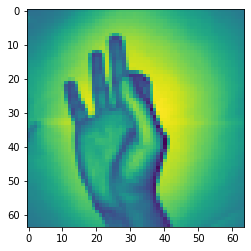

In [25]:
plt.imshow(X[0])

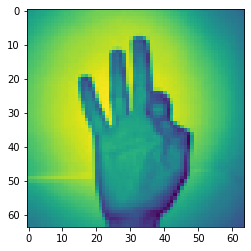

In [7]:
plt.imshow(X[1])

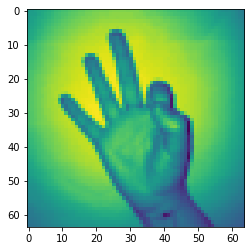

In [24]:
plt.imshow(X[2])

In [12]:
9 - np.argmax(Y[0])

9

Flatten the data and split it into training and test

In [13]:
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

Run the MLP classifier model

In [14]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20), random_state=1)

Run the predictions

In [15]:
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.3392568659127625


This model has a poor accuracy of around 33%

Let's reduce the number of dimensions of the image using PCA

In [16]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [17]:
d

292

From the above step it is seen that the number of dimensions have been reduced greatly to 292.

Train PCA on training data and do transformation

In [18]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [19]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1443, 292)
recovered shape: (1443, 4096)


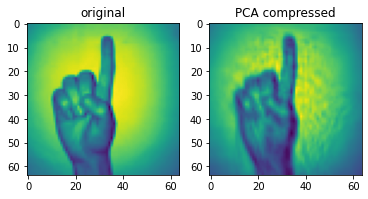

In [21]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[1].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[1].reshape((64,64)))
plt.show(block=True)

We could see that even after reducing the number of dimensions greatly we are still able to infer what the hand signal is.

Retrain the model with the dimensionality reduced data

In [22]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
clf_reduced.fit(X_reduced, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20))

In [23]:
X_test_reduced = pca.transform(X_test)

y_hat_reduced = clf_reduced.predict(X_test_reduced)

print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.6558966074313409


We could see that the accuracy has improved from 33 to 65 percent.

**Singular Value Decomposition**

SVD is a method of representing a matrix as a series of linear approximations that expose the underlying meaning-structure of the matrix.

In [26]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
svd.fit(X_train)
svd.transform(X_train)

array([[ 4.0288330e+01, -9.5609874e-01, -8.2943892e-01, -1.7109979e+00,
         1.9540393e+00],
       [ 4.5243156e+01, -4.4260707e+00,  2.0797458e+00,  2.5004995e-01,
         2.3135056e+00],
       [ 4.3416908e+01, -5.5337095e+00,  2.5429839e-01, -8.5246062e-01,
         1.2560682e+00],
       ...,
       [ 4.4416931e+01,  1.4218366e+00, -9.2870224e-01,  1.3596346e+00,
        -1.8898439e-01],
       [ 4.2629848e+01, -3.5358615e+00,  1.8103681e+00,  6.8613756e-01,
        -1.6637648e+00],
       [ 4.4729244e+01, -1.6281930e-01,  1.4352793e+00,  4.3003082e-02,
        -1.4594480e+00]], dtype=float32)

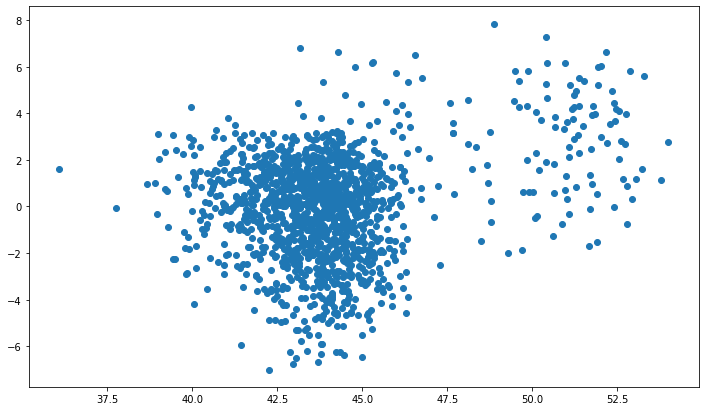

In [45]:
X_svd = TruncatedSVD(n_components=2, n_iter=5, algorithm='randomized').fit_transform(X_train)

plt.figure(figsize=(12,7))

plt.scatter(X_svd[:, 0], X_svd[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

**Locally Linear Embedding**

The LLE algorithm is a non-linear dimension-reducing technique, widely used due to its computational simplicity and intuitive approach. LLE first linearly reconstructs each input point from its nearest neighbors and then preserves these neighborhood relations in the low-dimensional embedding.

In [46]:
from sklearn.manifold import LocallyLinearEmbedding

X_reduced_lle = LocallyLinearEmbedding(random_state=7, eigen_solver='dense').fit_transform(X_train)

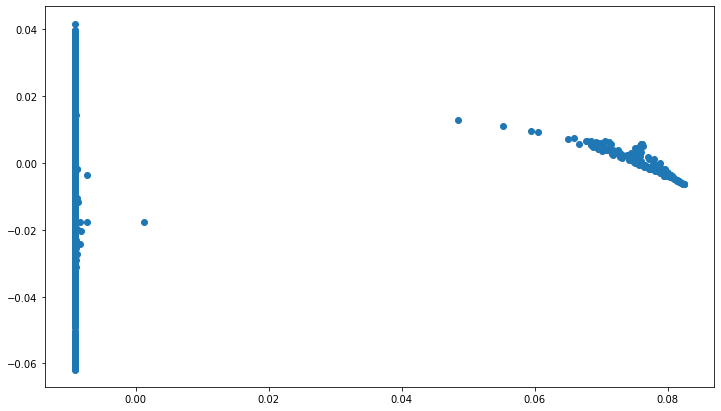

In [47]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

**t-SNE**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced_tsne = tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1443 samples in 0.006s...
[t-SNE] Computed neighbors for 1443 samples in 0.580s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1443
[t-SNE] Computed conditional probabilities for sample 1443 / 1443
[t-SNE] Mean sigma: 2.870731
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.729675
[t-SNE] KL divergence after 300 iterations: 1.648457


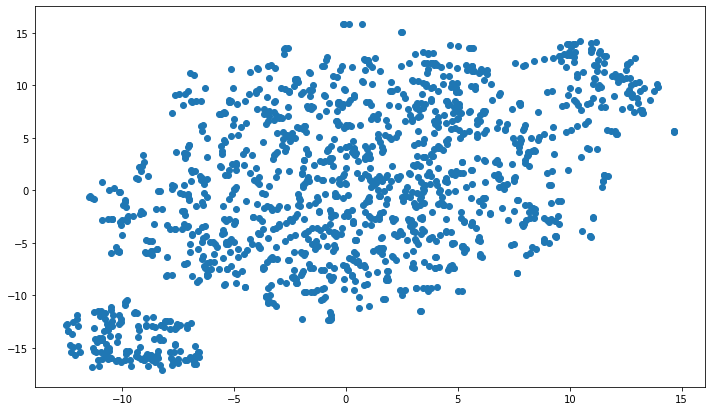

In [49]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

**ISOMAP**

Isomap is a nonlinear dimensionality reduction method used for computing a quasi-isometric, low-dimensional embedding of a set of high-dimensional data points.

In [50]:
from sklearn.manifold import Isomap

X_reduced_isomap = Isomap(n_components=2, n_neighbors=10, n_jobs=-1).fit_transform(X_train)


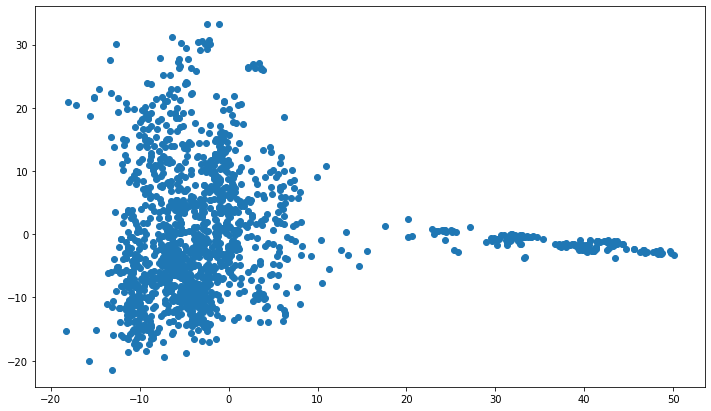

In [51]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

**UMAP**

UMAP is an algorithm for dimension reduction based on manifold learning techniques and ideas from topological data analysis. It provides a very general framework for approaching manifold learning and dimension reduction, but can also provide specific concrete realizations.

In [52]:
!pip install umap-learn
import umap

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 18.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=3a108f3deb24560b12fb055a0c049b96d9841684cc9f3fd0b25d8644dd2b8ddd
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=decaa3bdecab0c3e54a6f0f9b46936e1df1602d5b14cc86ee557a73f96742b8d
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [53]:
X_reduced_umap = umap.UMAP(n_neighbors=5).fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


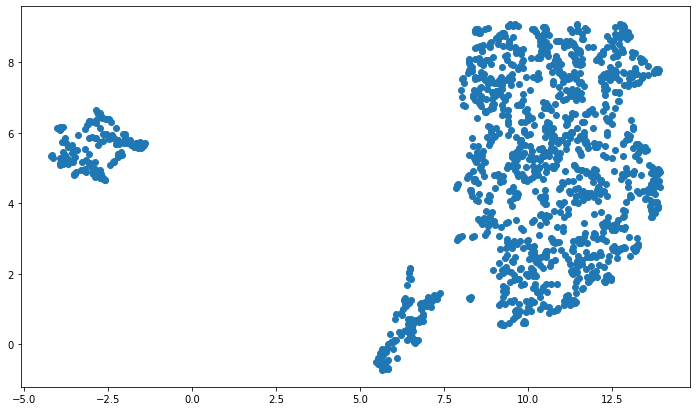

In [54]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()